## Install packages

In [ ]:
!pip3 install swifter
!pip3 install numpy-indexed
!pip3 install category_encoders

     |████████████████████████████████| 634kB 6.3MB/s eta 0:00:01
     |████████████████████████████████| 296kB 9.8MB/s 
     |████████████████████████████████| 573kB 13.7MB/s 
     |████████████████████████████████| 102kB 8.5MB/s 
     |████████████████████████████████| 48.5MB 157kB/s 
     |████████████████████████████████| 17.2MB 29.3MB/s 
     |████████████████████████████████| 2.9MB 53.7MB/s 
     |████████████████████████████████| 1.3MB 60.0MB/s 
     |████████████████████████████████| 81kB 10.4MB/s 
     |████████████████████████████████| 71kB 8.9MB/s 
     |████████████████████████████████| 204kB 54.9MB/s 
     |████████████████████████████████| 81kB 10.9MB/s 
     |████████████████████████████████| 133kB 61.0MB/s 
     |████████████████████████████████| 143kB 57.3MB/s 
     |████████████████████████████████| 296kB 58.9MB/s 
     |████████████████████████████████| 61kB 8.1MB/s 
     |████████████████████████████████| 102kB 11.5MB/s 
  Created wheel for swifter: filename=swifter


## Load Drive

In [ ]:
from google.colab import drive
import os
# 4/vAFKK2XMqhFnE1xT-qBasfw57ybPZ0tPSdrKKA5CYUcvl9NlLtBXVoE
drive.mount('/content/gdrive', force_remount=True)
os.chdir('/content/gdrive/My Drive/recsys/buyer_classification/')

Mounted at /content/gdrive


## Set Root Directory

In [ ]:
import os
os.chdir('/content/gdrive/My Drive/recsys/buyer_classification/')

In [ ]:
!wget http://s3-eu-west-1.amazonaws.com/yc-rdata/yoochoose-data.7z

--2020-07-30 20:09:06--  http://s3-eu-west-1.amazonaws.com/yc-rdata/yoochoose-data.7z
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.28.3
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.28.3|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 287211932 (274M) [application/octet-stream]
Saving to: ‘yoochoose-data.7z’

yoochoose-data.7z     0%[                    ] 159.42K   150KB/s               ^C


In [ ]:
!7z x yoochoose-data.7z.1


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=C.UTF-8,Utf16=on,HugeFiles=on,64 bits,8 CPUs Intel(R) Xeon(R) CPU E5-2623 v4 @ 2.60GHz (406F1),ASM,AES-NI)

Scanning the drive for archives:
  0M Sca        1 file, 287211932 bytes (274 MiB)

Extracting archive: yoochoose-data.7z.1
--
Path = yoochoose-data.7z.1
Type = 7z
Physical Size = 287211932
Headers Size = 255
Method = LZMA:24
Solid = +
Blocks = 2

      0% - yoochoose-buys.da                          1% - yoochoose-buys.da                          2% - yoochoose-buys.da                          2% 1 - yoochoose-clicks.da                              3% 1 - yoochoose-clicks.da                              4% 1 - yoochoose-clicks.da                              5% 1 - yoochoose-clicks.da                              6% 1 - yoochoose-clicks.da                              7% 1 - yoochoose-clicks.da                              8% 1 - yoochoose-clicks.da                              9% 1 

# Load Processed Data


In [ ]:
import pandas as pd
train_df = pd.read_csv("train_df_labels.csv")
train_df = train_df[list(train_df)[1:]]
train_df

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


session_id                         timestamp  ...  price_dist_avg  label
0                  1  2014-04-07 10:51:09.277000+00:00  ...             0.0  False
1                  1  2014-04-07 10:54:09.868000+00:00  ...             0.0  False
2                  1  2014-04-07 10:54:46.998000+00:00  ...             0.0  False
3                  1  2014-04-07 10:57:00.306000+00:00  ...             0.0  False
4                  2  2014-04-07 13:56:37.614000+00:00  ...             0.0  False
...              ...                               ...  ...             ...    ...
23768654    11299813  2014-09-24 16:34:32.102000+00:00  ...           157.0  False
23768655    11299813  2014-09-24 16:34:57.172000+00:00  ...           157.0  False
23768656    11299813  2014-09-24 16:35:59.016000+00:00  ...           157.0  False
23768657    11299814  2014-09-29 16:54:36.153000+00:00  ...             0.0  False
23768658    11299808  2014-09-27 15:23:24.869000+00:00  ...             0.0  False

[23768659 rows x 15 columns]

In [ ]:
import pandas as pd

valid_df = pd.read_csv("valid_df_labels.csv")
valid_df = valid_df[list(valid_df)[1:]]

print(valid_df)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


         session_id                         timestamp  ...  price_dist_avg  label
0                38  2014-04-04 05:16:09.704000+00:00  ...            0.00  False
1                38  2014-04-04 05:16:55.163000+00:00  ...            0.00  False
2                38  2014-04-04 05:17:34.463000+00:00  ...            0.00  False
3                54  2014-04-01 07:33:07.173000+00:00  ...          -52.50  False
4                54  2014-04-01 07:40:28.688000+00:00  ...          -96.25  False
...             ...                               ...  ...             ...    ...
2641233    11299809  2014-09-25 09:33:22.412000+00:00  ...           26.50  False
2641234    11299809  2014-09-25 09:43:52.821000+00:00  ...            0.00  False
2641235    11299811  2014-09-24 19:02:09.741000+00:00  ...            0.00  False
2641236    11299811  2014-09-24 19:02:11.894000+00:00  ...            0.00  False
2641237    11299811  2014-09-24 19:02:25.146000+00:00  ...           52.50  False

[2641238 rows x

In [ ]:
import pandas as pd

test_df = pd.read_csv("test_df_labels.csv")
test_df = test_df[list(test_df)[1:]]

print(test_df)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


         session_id  ... price_dist_avg
0                38  ...           0.00
1                38  ...           0.00
2                38  ...           0.00
3                54  ...         -52.50
4                54  ...         -96.25
...             ...  ...            ...
2641239    11299809  ...          26.50
2641240    11299809  ...           0.00
2641241    11299811  ...           0.00
2641242    11299811  ...           0.00
2641243    11299811  ...          52.50

[2641244 rows x 14 columns]


# DATA PREPARING -----------


In [ ]:
aux = valid_df[valid_df.session_id == 78]
aux

session_id                         timestamp  ...  label item_id_prob
11          78  2014-04-04 14:28:00.684000+00:00  ...  False     0.026000
12          78  2014-04-04 14:30:05.230000+00:00  ...  False     0.050847
13          78  2014-04-04 14:30:44.963000+00:00  ...  False     0.002000
14          78  2014-04-04 14:31:29.660000+00:00  ...  False     0.026000
15          78  2014-04-04 14:32:03.150000+00:00  ...  False     0.026000
16          78  2014-04-04 14:35:19.399000+00:00  ...  False     0.026000
17          78  2014-04-04 14:39:58.610000+00:00  ...  False     0.070000
18          78  2014-04-04 14:40:31.139000+00:00  ...  False     0.068000
19          78  2014-04-04 14:44:27.928000+00:00  ...  False     0.000000
20          78  2014-04-04 14:51:47.704000+00:00  ...  False     0.060000

[10 rows x 15 columns]

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
new_aux = aux.drop(['timestamp','date','label','session_id'],axis=1)

new_aux['item_id'] = le.fit_transform(new_aux.item_id)
new_aux

item_id category  dwelltime  ...  item_rank  price_dist_avg  item_id_prob
11        1        0          0  ...        3.0          -262.5      0.026000
12        2        0        124  ...        0.0             0.0      0.050847
13        0        0         39  ...        0.0             0.0      0.002000
14        1        0         44  ...        3.0          -262.5      0.026000
15        1        0         33  ...        3.0          -262.5      0.026000
16        1        0        196  ...        3.0          -262.5      0.026000
17        5        0        279  ...       30.0             0.0      0.070000
18        6        0         32  ...      500.0             0.0      0.068000
19        3        0        236  ...        0.0             0.0      0.000000
20        4        0        439  ...     1144.0          -104.6      0.060000

[10 rows x 11 columns]

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

aux['order-item-id'] = le.fit_transform(aux['item_id'])
aux.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


session_id                         timestamp  ...  label order-item-id
11          78  2014-04-04 14:28:00.684000+00:00  ...  False             1
12          78  2014-04-04 14:30:05.230000+00:00  ...  False             2
13          78  2014-04-04 14:30:44.963000+00:00  ...  False             0
14          78  2014-04-04 14:31:29.660000+00:00  ...  False             1
15          78  2014-04-04 14:32:03.150000+00:00  ...  False             1

[5 rows x 15 columns]

In [ ]:
cols = ['order-item-id', 'category', 'dwelltime', 'weekday','day', 'hour', 'month', 'week', 'item_rank', 'price_dist_avg']

aux = aux[cols]
aux.head(10)

order-item-id category  dwelltime  ...  week  item_rank  price_dist_avg
11              1        0          0  ...    14        3.0          -262.5
12              2        0        124  ...    14        0.0             0.0
13              0        0         39  ...    14        0.0             0.0
14              1        0         44  ...    14        3.0          -262.5
15              1        0         33  ...    14        3.0          -262.5
16              1        0        196  ...    14        3.0          -262.5
17              5        0        279  ...    14       30.0             0.0
18              6        0         32  ...    14      500.0             0.0
19              3        0        236  ...    14        0.0             0.0
20              4        0        439  ...    14     1144.0          -104.6

[10 rows x 10 columns]

# Scale Data

In [ ]:
train_df = train_df.fillna(0.0)
train_df

session_id                         timestamp  ...  price_dist_avg  label
0                  2  2014-04-07 13:56:37.614000+00:00  ...             0.0  False
1                  2  2014-04-07 13:57:19.373000+00:00  ...             0.0  False
2                  2  2014-04-07 13:58:37.446000+00:00  ...             0.0  False
3                  2  2014-04-07 13:59:50.710000+00:00  ...             0.0  False
4                  2  2014-04-07 14:00:38.247000+00:00  ...             0.0  False
...              ...                               ...  ...             ...    ...
29694892    11299814  2014-09-29 16:54:36.153000+00:00  ...             0.0  False
29694893    11299808  2014-09-27 15:23:24.869000+00:00  ...             0.0  False
29694894    11299811  2014-09-24 19:02:09.741000+00:00  ...             0.0  False
29694895    11299811  2014-09-24 19:02:11.894000+00:00  ...             0.0  False
29694896    11299811  2014-09-24 19:02:25.146000+00:00  ...            52.5  False

[29694897 rows x 14 columns]

In [ ]:
valid_df = valid_df.fillna(0.0)
valid_df

session_id                         timestamp  ...  price_dist_avg  label
0                 1  2014-04-07 10:51:09.277000+00:00  ...             0.0  False
1                 1  2014-04-07 10:54:09.868000+00:00  ...             0.0  False
2                 1  2014-04-07 10:54:46.998000+00:00  ...             0.0  False
3                 1  2014-04-07 10:57:00.306000+00:00  ...             0.0  False
4                 8  2014-04-06 08:49:58.728000+00:00  ...             0.0  False
...             ...                               ...  ...             ...    ...
3308975    11299782  2014-09-24 18:57:30.114000+00:00  ...             0.0  False
3308976    11299809  2014-09-25 09:28:02.827000+00:00  ...             0.0  False
3308977    11299809  2014-09-25 09:28:54.290000+00:00  ...             0.0  False
3308978    11299809  2014-09-25 09:33:22.412000+00:00  ...             0.0  False
3308979    11299809  2014-09-25 09:43:52.821000+00:00  ...             0.0  False

[3308980 rows x 13 columns]

## Dwelltime

In [ ]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.preprocessing import RobustScaler

scaler3 = StandardScaler().fit(train_df[['dwelltime']])

In [ ]:
train_df['dwelltime'] = scaler3.transform(train_df[['dwelltime']])
train_df

session_id                         timestamp  ...  price_dist_avg  label
0                  1  2014-04-07 10:51:09.277000+00:00  ...             0.0  False
1                  1  2014-04-07 10:54:09.868000+00:00  ...             0.0  False
2                  1  2014-04-07 10:54:46.998000+00:00  ...             0.0  False
3                  1  2014-04-07 10:57:00.306000+00:00  ...             0.0  False
4                  2  2014-04-07 13:56:37.614000+00:00  ...             0.0  False
...              ...                               ...  ...             ...    ...
23768654    11299813  2014-09-24 16:34:32.102000+00:00  ...           157.0  False
23768655    11299813  2014-09-24 16:34:57.172000+00:00  ...           157.0  False
23768656    11299813  2014-09-24 16:35:59.016000+00:00  ...           157.0  False
23768657    11299814  2014-09-29 16:54:36.153000+00:00  ...             0.0  False
23768658    11299808  2014-09-27 15:23:24.869000+00:00  ...             0.0  False

[23768659 rows x 15 columns]

In [ ]:
valid_df['dwelltime'] = scaler3.transform(valid_df[['dwelltime']])
valid_df

session_id                         timestamp  ...  price_dist_avg  label
0                38  2014-04-04 05:16:09.704000+00:00  ...            0.00  False
1                38  2014-04-04 05:16:55.163000+00:00  ...            0.00  False
2                38  2014-04-04 05:17:34.463000+00:00  ...            0.00  False
3                54  2014-04-01 07:33:07.173000+00:00  ...          -52.50  False
4                54  2014-04-01 07:40:28.688000+00:00  ...          -96.25  False
...             ...                               ...  ...             ...    ...
2641233    11299809  2014-09-25 09:33:22.412000+00:00  ...           26.50  False
2641234    11299809  2014-09-25 09:43:52.821000+00:00  ...            0.00  False
2641235    11299811  2014-09-24 19:02:09.741000+00:00  ...            0.00  False
2641236    11299811  2014-09-24 19:02:11.894000+00:00  ...            0.00  False
2641237    11299811  2014-09-24 19:02:25.146000+00:00  ...           52.50  False

[2641238 rows x 14 columns]

In [ ]:
test_df['dwelltime'] = scaler3.transform(test_df[['dwelltime']])
test_df

session_id  ... price_dist_avg
0                38  ...           0.00
1                38  ...           0.00
2                38  ...           0.00
3                54  ...         -52.50
4                54  ...         -96.25
...             ...  ...            ...
2641239    11299809  ...          26.50
2641240    11299809  ...           0.00
2641241    11299811  ...           0.00
2641242    11299811  ...           0.00
2641243    11299811  ...          52.50

[2641244 rows x 14 columns]

## Item Rank

In [ ]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.preprocessing import RobustScaler

scaler = StandardScaler().fit(train_df[['item_rank']])

In [ ]:
train_df['item_rank'] = scaler.transform(train_df[['item_rank']])
train_df

session_id                         timestamp  ...  price_dist_avg  label
0                  1  2014-04-07 10:51:09.277000+00:00  ...             0.0  False
1                  1  2014-04-07 10:54:09.868000+00:00  ...             0.0  False
2                  1  2014-04-07 10:54:46.998000+00:00  ...             0.0  False
3                  1  2014-04-07 10:57:00.306000+00:00  ...             0.0  False
4                  2  2014-04-07 13:56:37.614000+00:00  ...             0.0  False
...              ...                               ...  ...             ...    ...
23768654    11299813  2014-09-24 16:34:32.102000+00:00  ...           157.0  False
23768655    11299813  2014-09-24 16:34:57.172000+00:00  ...           157.0  False
23768656    11299813  2014-09-24 16:35:59.016000+00:00  ...           157.0  False
23768657    11299814  2014-09-29 16:54:36.153000+00:00  ...             0.0  False
23768658    11299808  2014-09-27 15:23:24.869000+00:00  ...             0.0  False

[23768659 rows x 15 columns]

In [ ]:
valid_df['item_rank'] = scaler.transform(valid_df[['item_rank']])
valid_df

session_id                         timestamp  ...  price_dist_avg  label
0                38  2014-04-04 05:16:09.704000+00:00  ...            0.00  False
1                38  2014-04-04 05:16:55.163000+00:00  ...            0.00  False
2                38  2014-04-04 05:17:34.463000+00:00  ...            0.00  False
3                54  2014-04-01 07:33:07.173000+00:00  ...          -52.50  False
4                54  2014-04-01 07:40:28.688000+00:00  ...          -96.25  False
...             ...                               ...  ...             ...    ...
2641233    11299809  2014-09-25 09:33:22.412000+00:00  ...           26.50  False
2641234    11299809  2014-09-25 09:43:52.821000+00:00  ...            0.00  False
2641235    11299811  2014-09-24 19:02:09.741000+00:00  ...            0.00  False
2641236    11299811  2014-09-24 19:02:11.894000+00:00  ...            0.00  False
2641237    11299811  2014-09-24 19:02:25.146000+00:00  ...           52.50  False

[2641238 rows x 14 columns]

In [ ]:
test_df['item_rank'] = scaler.transform(test_df[['item_rank']])
test_df

session_id  ... price_dist_avg
0                38  ...           0.00
1                38  ...           0.00
2                38  ...           0.00
3                54  ...         -52.50
4                54  ...         -96.25
...             ...  ...            ...
2641239    11299809  ...          26.50
2641240    11299809  ...           0.00
2641241    11299811  ...           0.00
2641242    11299811  ...           0.00
2641243    11299811  ...          52.50

[2641244 rows x 14 columns]

## Item Price

In [ ]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.preprocessing import RobustScaler

scaler = StandardScaler().fit(train_df[['price_dist_avg']])

In [ ]:
train_df['price_dist_avg'] = scaler.transform(train_df[['price_dist_avg']])
train_df

session_id                         timestamp  ...  price_dist_avg  label
0                  1  2014-04-07 10:51:09.277000+00:00  ...        0.067175  False
1                  1  2014-04-07 10:54:09.868000+00:00  ...        0.067175  False
2                  1  2014-04-07 10:54:46.998000+00:00  ...        0.067175  False
3                  1  2014-04-07 10:57:00.306000+00:00  ...        0.067175  False
4                  2  2014-04-07 13:56:37.614000+00:00  ...        0.067175  False
...              ...                               ...  ...             ...    ...
23768654    11299813  2014-09-24 16:34:32.102000+00:00  ...        0.484944  False
23768655    11299813  2014-09-24 16:34:57.172000+00:00  ...        0.484944  False
23768656    11299813  2014-09-24 16:35:59.016000+00:00  ...        0.484944  False
23768657    11299814  2014-09-29 16:54:36.153000+00:00  ...        0.067175  False
23768658    11299808  2014-09-27 15:23:24.869000+00:00  ...        0.067175  False

[23768659 rows x 15 columns]

In [ ]:
valid_df['price_dist_avg'] = scaler.transform(valid_df[['price_dist_avg']])
valid_df

session_id                         timestamp  ...  price_dist_avg  label
0                38  2014-04-04 05:16:09.704000+00:00  ...        0.067175  False
1                38  2014-04-04 05:16:55.163000+00:00  ...        0.067175  False
2                38  2014-04-04 05:17:34.463000+00:00  ...        0.067175  False
3                54  2014-04-01 07:33:07.173000+00:00  ...       -0.072525  False
4                54  2014-04-01 07:40:28.688000+00:00  ...       -0.188942  False
...             ...                               ...  ...             ...    ...
2641233    11299809  2014-09-25 09:33:22.412000+00:00  ...        0.137690  False
2641234    11299809  2014-09-25 09:43:52.821000+00:00  ...        0.067175  False
2641235    11299811  2014-09-24 19:02:09.741000+00:00  ...        0.067175  False
2641236    11299811  2014-09-24 19:02:11.894000+00:00  ...        0.067175  False
2641237    11299811  2014-09-24 19:02:25.146000+00:00  ...        0.206875  False

[2641238 rows x 14 columns]

In [ ]:
test_df['price_dist_avg'] = scaler.transform(test_df[['price_dist_avg']])
test_df

session_id  ... price_dist_avg
0                38  ...       0.067175
1                38  ...       0.067175
2                38  ...       0.067175
3                54  ...      -0.072525
4                54  ...      -0.188942
...             ...  ...            ...
2641239    11299809  ...       0.137690
2641240    11299809  ...       0.067175
2641241    11299811  ...       0.067175
2641242    11299811  ...       0.067175
2641243    11299811  ...       0.206875

[2641244 rows x 14 columns]

## Save and Load

In [ ]:
train_df.to_csv("train_df_scaled.csv")

In [ ]:
valid_df.to_csv("valid_df_scaled.csv")

In [ ]:

test_df.to_csv("test_df_scaled.csv")

In [ ]:
print("Total sessions in valid removing: ", len(valid_df[valid_df.label == True].groupby('session_id')))

Total sessions in valid removing:  50797


In [ ]:
import pandas as pd
train_df = pd.read_csv("train_df_scaled.csv")
train_df
train_df = train_df[list(train_df)[1:]]
train_df

KeyboardInterrupt: ignored

In [ ]:
import pandas as pd

valid_df = pd.read_csv("valid_df_scaled.csv")
valid_df = valid_df[list(valid_df)[1:]]

print(valid_df)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


KeyboardInterrupt: ignored

In [ ]:
import pandas as pd

test_df = pd.read_csv("test_df_scaled.csv")
test_df = test_df[list(test_df)[1:]]

print(test_df)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


         session_id  ... price_dist_avg
0                38  ...       0.067175
1                38  ...       0.067175
2                38  ...       0.067175
3                54  ...      -0.072525
4                54  ...      -0.188942
...             ...  ...            ...
2641239    11299809  ...       0.137690
2641240    11299809  ...       0.067175
2641241    11299811  ...       0.067175
2641242    11299811  ...       0.067175
2641243    11299811  ...       0.206875

[2641244 rows x 14 columns]


In [ ]:
len(test_df.groupby('session_id'))

739979

# Remove rows in valid with not contain items and category in training



In [ ]:
print("Total sessions in valid before removing: ", len(valid_df.groupby('session_id')))

Total sessions in valid before removing:  925152


In [ ]:
# print("Before valid_df ", valid_df.shape)

# valid_df = valid_df[valid_df.item_id.isin(train_df_c.item_id.values)]
# valid_df = valid_df[valid_df.category.isin(train_df_c.category.values)]
# print("After valid_df ", valid_df.shape)
# print("Total sessions in valid  after removing: ", len(valid_df.groupby('session_id')))

# valid_df

Before valid_df  (3308980, 13)
After valid_df  (2774803, 13)
Total sessions in valid  after removing:  849739


session_id                         timestamp  ...  price_dist_avg  label
0                 1  2014-04-07 10:51:09.277000+00:00  ...        0.070217  False
6                18  2014-04-01 05:26:12.539000+00:00  ...        0.070217  False
7                18  2014-04-01 05:26:32.156000+00:00  ...        0.070217  False
8                31  2014-04-01 08:36:04.146000+00:00  ...       -1.251037  False
9                31  2014-04-01 08:38:17.758000+00:00  ...       -1.251037  False
...             ...                               ...  ...             ...    ...
3308975    11299782  2014-09-24 18:57:30.114000+00:00  ...        0.070217  False
3308976    11299809  2014-09-25 09:28:02.827000+00:00  ...        0.070217  False
3308977    11299809  2014-09-25 09:28:54.290000+00:00  ...        0.070217  False
3308978    11299809  2014-09-25 09:33:22.412000+00:00  ...        0.137100  False
3308979    11299809  2014-09-25 09:43:52.821000+00:00  ...        0.070217  False

[2774803 rows x 13 columns]

In [ ]:
print("Total sessions in valid  after removing: ", len(valid_df[valid_df.label == True].groupby('session_id')))

Total sessions in valid  after removing:  48684


# Remove big sessions

In [ ]:
MAX_SEQ = 25
def get_large_s_ids(df,max_seq=MAX_SEQ):
  element_group_sizes = df.session_id.groupby(df.session_id).size()
  large_groups = element_group_sizes[element_group_sizes > max_seq]
  large_s_ids = large_groups.index.unique()

  return large_s_ids

In [ ]:
def get_large_s_ids(df,max_seq=MAX_SEQ):
  element_group_sizes = df.session_id.groupby(df.session_id).transform('size')
  large_groups = element_group_sizes[element_group_sizes > max_seq].reset_index()
  large_groups.columns = ['session_id','sizes']
  large_s = df[df.session_id.isin(large_groups.session_id.values)]
  large_s_ids = large_s.session_id.unique()

  return large_s_ids

In [ ]:
large_train_ids_c = get_large_s_ids(train_df)

print(train_df.shape)
print("Total large train",large_train_ids_c.shape)

print("Percent by total", large_train_ids_c.shape[0]/train_df.shape[0])

(24748661, 14)
Total large train (27115,)
Percent by total 0.001095614829424509


In [ ]:
large_valid_ids = get_large_s_ids(valid_df)

print(valid_df.shape)
print("Total large valid", large_valid_ids.shape)

print("Percent by total", large_valid_ids.shape[0]/valid_df.shape[0])

(8236152, 14)
Total large valid (9141,)
Percent by total 0.0011098629554189869


In [ ]:
large_test_ids = get_large_s_ids(test_df)

print(test_df.shape)
print("Total large test", large_test_ids.shape)

print("Percent by total", large_test_ids.shape[0]/test_df.shape[0])

(6315083, 14)
Total large test (0,)
Percent by total 0.0


In [ ]:
import pandas as pd

def truncate_seq(x):
  return x[-MAX_SEQ:]

def apply_truncate_in_large(df, large_s_ids):
  filtered =  df[df.session_id.isin(large_s_ids)].groupby('session_id').apply(truncate_seq).reset_index(drop=True)
  cols = list(df.columns)
  idxNames = df[df.session_id.isin(large_s_ids)].index
  df = df.drop(idxNames) # remove large sids
  df = pd.concat((df, filtered))
  return df 

def remove_larges(df, larges_s_ids):
  return df[~df.session_id.isin(larges_s_ids)]

In [ ]:
train_df = remove_larges(train_df, large_train_ids_c)
train_df.shape

(23725597, 14)

In [ ]:
train_df.shape

(23725597, 14)

# Categorize Hour

In [ ]:

labels = [0,1,2,3]
train_df['hour'] = pd.cut(train_df['hour'], bins=[0,6,12,18,24], include_lowest=True, labels=labels)
valid_df['hour'] = pd.cut(valid_df['hour'], bins=[0,6,12,18,24], include_lowest=True, labels=labels)
test_df['hour'] = pd.cut(test_df['hour'], bins=[0,6,12,18,24], include_lowest=True, labels=labels)

valid_df

session_id                         timestamp  ...  price_dist_avg  label
0                38  2014-04-04 05:16:09.704000+00:00  ...        0.067175  False
1                38  2014-04-04 05:16:55.163000+00:00  ...        0.067175  False
2                38  2014-04-04 05:17:34.463000+00:00  ...        0.067175  False
3                54  2014-04-01 07:33:07.173000+00:00  ...       -0.072525  False
4                54  2014-04-01 07:40:28.688000+00:00  ...       -0.188942  False
...             ...                               ...  ...             ...    ...
2641233    11299809  2014-09-25 09:33:22.412000+00:00  ...        0.137690  False
2641234    11299809  2014-09-25 09:43:52.821000+00:00  ...        0.067175  False
2641235    11299811  2014-09-24 19:02:09.741000+00:00  ...        0.067175  False
2641236    11299811  2014-09-24 19:02:11.894000+00:00  ...        0.067175  False
2641237    11299811  2014-09-24 19:02:25.146000+00:00  ...        0.206875  False

[2641238 rows x 14 columns]

# Remove rare items

In [ ]:
db_path = 'yoochoose-buys.dat'
b_cols = ['session_id','timestamp','item_id','price','quantity']
db = pd.read_csv(db_path,sep=',',header=None,names=b_cols)
print("before db.shape",db.shape)
#change db to train_df_c sessions
db = db[db.session_id.isin(train_df.session_id)]
print("after db.shape",db.shape)
#change db to train_df_c sessions
db = db[db.quantity != 0] # remove noise data
db = db[db.price != 0] # remove noise data
db

before db.shape (1150753, 5)
after db.shape (828082, 5)


session_id                 timestamp    item_id  price  quantity
0            420374  2014-04-06T18:44:58.314Z  214537888  12462         1
1            420374  2014-04-06T18:44:58.325Z  214537850  10471         1
3            420368  2014-04-04T06:13:28.848Z  214530572   6073         1
4            420368  2014-04-04T06:13:28.858Z  214835025   2617         1
5            140806  2014-04-07T09:22:28.132Z  214668193    523         1
...             ...                       ...        ...    ...       ...
1150745    11330173  2014-09-24T07:45:04.895Z  214857204  12462         1
1150746    11330173  2014-09-24T07:45:04.902Z  214835000   7329         3
1150747    11330173  2014-09-24T07:45:04.953Z  214835000   9424         1
1150749    11368691  2014-09-25T09:37:44.206Z  214700002   6806         5
1150750    11523941  2014-09-25T06:14:47.965Z  214578011  14556         1

[389451 rows x 5 columns]

### all

In [ ]:
## nonbuyers

counts = train_df.item_id.value_counts()
countsb = pd.DataFrame(counts)
countsb = countsb.reset_index()
countsb.columns = ['unique_values', 'counts'] 
countsb

unique_values  counts
0          643078800  105475
1          214853094   90437
2          214829878   81598
3          214853420   56721
4          214826610   49962
...              ...     ...
50320      214831110       1
50321      214761210       1
50322      214704238       1
50323      214844694       1
50324      214765080       1

[50325 rows x 2 columns]

In [ ]:
MIN_C = 100
c = countsb.counts
countsb[c >= MIN_C]

unique_values  counts
0          643078800  105475
1          214853094   90437
2          214829878   81598
3          214853420   56721
4          214826610   49962
...              ...     ...
15597      214713095     100
15598      214699869     100
15599      214639352     100
15600      214545107     100
15601      214629517     100

[15602 rows x 2 columns]

In [ ]:
print("Before: df.shape",train_df.shape)
#nonbuyers
idx_to_rem = countsb[countsb.counts >= MIN_C].unique_values.values
# counts = train_df['item_id'].value_counts()

print(idx_to_rem[0:20])
print(idx_to_rem.shape)
allbuyers = train_df[train_df['item_id'].isin(idx_to_rem)]
print(allbuyers)
print("After: df.shape",allbuyers.shape)
print("difference: df.shape",train_df.shape[0] - allbuyers.shape[0])

Before: df.shape (23768659, 15)
[643078800 214853094 214829878 214853420 214826610 214853096 214748336
 214834880 214839973 214821309 214850743 214684093 214834877 214835017
 214836932 214821305 214829880 214717003 214829747 214835019]
(15602,)
          session_id                         timestamp  ...  price_dist_avg  label
0                  1  2014-04-07 10:51:09.277000+00:00  ...        0.067175  False
1                  1  2014-04-07 10:54:09.868000+00:00  ...        0.067175  False
3                  1  2014-04-07 10:57:00.306000+00:00  ...        0.067175  False
4                  2  2014-04-07 13:56:37.614000+00:00  ...        0.067175  False
5                  2  2014-04-07 13:57:19.373000+00:00  ...        0.067175  False
...              ...                               ...  ...             ...    ...
23768654    11299813  2014-09-24 16:34:32.102000+00:00  ...        0.484944  False
23768655    11299813  2014-09-24 16:34:57.172000+00:00  ...        0.484944  False
23768656

In [ ]:
train_df = allbuyers
train_df

session_id                         timestamp  ...  price_dist_avg  label
0                  1  2014-04-07 10:51:09.277000+00:00  ...        0.067175  False
1                  1  2014-04-07 10:54:09.868000+00:00  ...        0.067175  False
3                  1  2014-04-07 10:57:00.306000+00:00  ...        0.067175  False
4                  2  2014-04-07 13:56:37.614000+00:00  ...        0.067175  False
5                  2  2014-04-07 13:57:19.373000+00:00  ...        0.067175  False
...              ...                               ...  ...             ...    ...
23768654    11299813  2014-09-24 16:34:32.102000+00:00  ...        0.484944  False
23768655    11299813  2014-09-24 16:34:57.172000+00:00  ...        0.484944  False
23768656    11299813  2014-09-24 16:35:59.016000+00:00  ...        0.484944  False
23768657    11299814  2014-09-29 16:54:36.153000+00:00  ...        0.067175  False
23768658    11299808  2014-09-27 15:23:24.869000+00:00  ...        0.067175  False

[23167531 rows x 15 columns]

### non-buyers

In [ ]:
buyers_items = db.item_id.unique()
buyers_items

array([214537888, 214537850, 214535653, ..., 214857542, 214817795,
       214813963])

In [ ]:
## nonbuyers

counts = train_df.item_id.value_counts()

countsnb = pd.DataFrame(counts)
countsnb = countsnb.reset_index()
countsnb.columns = ['unique_values', 'counts'] 
countsnb

unique_values  counts
0          643078800  119183
1          214853094  101843
2          214829878   91730
3          214853420   63724
4          214826610   56475
...              ...     ...
51157      214786586       1
51158      214846547       1
51159      214682848       1
51160      214790458       1
51161      214724242       1

[51162 rows x 2 columns]

In [ ]:
countsnb = countsnb[~countsnb.unique_values.isin(buyers_items)]
countsnb

unique_values  counts
0          643078800  119183
102        214835132   21299
133        214831959   19861
158        214836512   18678
162        214602598   18493
...              ...     ...
51157      214786586       1
51158      214846547       1
51159      214682848       1
51160      214790458       1
51161      214724242       1

[36171 rows x 2 columns]

In [ ]:
from collections import Counter
countsnb[countsnb.counts >= 100]

unique_values  counts
0          643078800  119183
102        214835132   21299
133        214831959   19861
158        214836512   18678
162        214602598   18493
...              ...     ...
16343      214574730     100
16344      214711097     100
16346      214829047     100
16348      214577587     100
16350      214845718     100

[4927 rows x 2 columns]

In [ ]:
print("Before: df.shape",train_df.shape)
#nonbuyers
MIN_C = 100
idx_to_rem = countsnb[countsnb.counts >= MIN_C].unique_values.values
# counts = train_df['item_id'].value_counts()

print(idx_to_rem[0:20])
print(idx_to_rem.shape)
nonbuyers = train_df[train_df['item_id'].isin(idx_to_rem)]
print(nonbuyers)
print("After: df.shape",nonbuyers.shape)
print("Total buyers", train_df[train_df.label == True].item_id.unique().shape)
print("difference: df.shape",train_df.shape[0] - nonbuyers.shape[0])

Before: df.shape (26739960, 15)
[643078800 214835132 214831959 214836512 214602598 214835124 214838092
 214835107 214836881 214832126 214835122 214844370 214839356 214839956
 214845129 214837280 214832128 214829762 214836527 214826977]
(4927,)
          session_id                         timestamp  ...  price_dist_avg  label
1                  1  2014-04-07 10:54:09.868000+00:00  ...        0.070833  False
3                  1  2014-04-07 10:57:00.306000+00:00  ...        0.070833  False
97                29  2014-04-02 17:42:07.324000+00:00  ...        0.070833  False
102               32  2014-04-07 15:45:12.308000+00:00  ...        0.070833  False
103               32  2014-04-07 15:47:58.163000+00:00  ...        0.070833  False
...              ...                               ...  ...             ...    ...
26739603    11299653  2014-09-27 20:18:14.661000+00:00  ...        0.070833  False
26739627    11299656  2014-09-26 12:44:58.515000+00:00  ...        0.070833  False
26739647 

In [ ]:
import gc
gc.collect()

45

### buyers

In [ ]:
## nonbuyers

counts = train_df.item_id.value_counts()

countsb = pd.DataFrame(counts)
countsb = countsb.reset_index()
countsb.columns = ['unique_values', 'counts'] 
countsb

unique_values  counts
0          643078800  119183
1          214853094  101843
2          214829878   91730
3          214853420   63724
4          214826610   56475
...              ...     ...
51157      214786586       1
51158      214846547       1
51159      214682848       1
51160      214790458       1
51161      214724242       1

[51162 rows x 2 columns]

In [ ]:
countsb = countsb[countsb.unique_values.isin(buyers_items)]
countsb

unique_values  counts
1          214853094  101843
2          214829878   91730
3          214853420   63724
4          214826610   56475
5          214853096   53786
...              ...     ...
50299      214817795       1
50406      214746129       1
50767      214775156       1
50890      214811760       1
51093      214813712       1

[14991 rows x 2 columns]

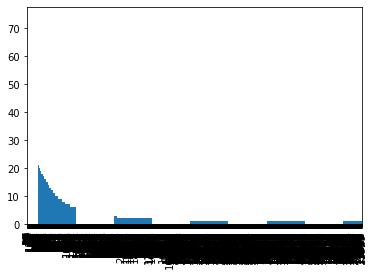

In [ ]:
countsb.counts.value_counts().plot.bar()

In [ ]:
MIN_C = 100
filtered = countsb[countsb.counts >= MIN_C]
filtered

unique_values  counts
1          214853094  101843
2          214829878   91730
3          214853420   63724
4          214826610   56475
5          214853096   53786
...              ...     ...
16342      214692641     100
16345      214552616     100
16347      214677902     100
16349      214839260     100
16351      214840663     100

[11425 rows x 2 columns]

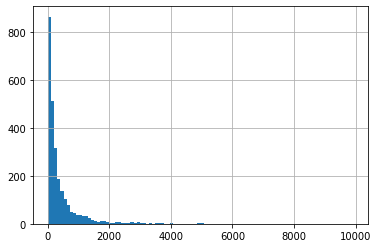

In [ ]:
filtered.counts.hist(bins=100)

In [ ]:
import gc

gc.collect()

print("Before: df.shape",train_df.shape)
#nonbuyers
idx_to_rem = filtered.unique_values.values
# counts = train_df['item_id'].value_counts()

print(idx_to_rem[0:20])
print(idx_to_rem.shape)
buyers = train_df[train_df['item_id'].isin(idx_to_rem)]
print(buyers)
print("After: df.shape",buyers.shape)
print("difference: df.shape",train_df.shape[0] - buyers.shape[0])

Before: df.shape (26739960, 15)
[214853094 214829878 214853420 214826610 214853096 214748336 214834880
 214839973 214821309 214850743 214684093 214834877 214835017 214821305
 214836932 214829880 214717003 214829747 214835019 214853090]
(11425,)
          session_id                         timestamp  ...  price_dist_avg  label
0                  1  2014-04-07 10:51:09.277000+00:00  ...        0.070833  False
4                  2  2014-04-07 13:56:37.614000+00:00  ...        0.070833  False
5                  2  2014-04-07 13:57:19.373000+00:00  ...        0.070833  False
6                  2  2014-04-07 13:58:37.446000+00:00  ...        0.070833  False
7                  2  2014-04-07 13:59:50.710000+00:00  ...        0.070833  False
...              ...                               ...  ...             ...    ...
26739955    11299809  2014-09-25 09:33:22.412000+00:00  ...        0.138994  False
26739956    11299809  2014-09-25 09:43:52.821000+00:00  ...        0.070833  False
26739957

In [ ]:
train_df_c = pd.concat([nonbuyers,buyers],axis=0)
train_df_c 

session_id                         timestamp  ...  price_dist_avg  label
4                  2  2014-04-07 14:00:38.247000+00:00  ...             0.0  False
91                29  2014-04-02 17:42:07.324000+00:00  ...             0.0  False
98                32  2014-04-07 15:45:12.308000+00:00  ...             0.0  False
99                32  2014-04-07 15:47:58.163000+00:00  ...             0.0  False
273               86  2014-04-01 18:25:44.766000+00:00  ...             0.0  False
...              ...                               ...  ...             ...    ...
29694892    11299814  2014-09-29 16:54:36.153000+00:00  ...             0.0  False
29694893    11299808  2014-09-27 15:23:24.869000+00:00  ...             0.0  False
29694894    11299811  2014-09-24 19:02:09.741000+00:00  ...             0.0  False
29694895    11299811  2014-09-24 19:02:11.894000+00:00  ...             0.0  False
29694896    11299811  2014-09-24 19:02:25.146000+00:00  ...            52.5  False

[29092174 rows x 14 columns]

In [ ]:
train_df_c = train_df_c.sort_values(['session_id','timestamp'])
print(train_df_c)

          session_id                         timestamp  ...  price_dist_avg  label
0                  2  2014-04-07 13:56:37.614000+00:00  ...             0.0  False
1                  2  2014-04-07 13:57:19.373000+00:00  ...             0.0  False
2                  2  2014-04-07 13:58:37.446000+00:00  ...             0.0  False
3                  2  2014-04-07 13:59:50.710000+00:00  ...             0.0  False
4                  2  2014-04-07 14:00:38.247000+00:00  ...             0.0  False
...              ...                               ...  ...             ...    ...
28999958    11562158  2014-09-26 04:50:29.172000+00:00  ...             0.0  False
28999959    11562158  2014-09-26 04:52:21.900000+00:00  ...             0.0  False
28999960    11562158  2014-09-26 05:16:32.904000+00:00  ...             0.0  False
28999961    11562159  2014-09-26 19:16:28.897000+00:00  ...             0.0  False
28999948    11562161  2014-09-26 20:45:42.791000+00:00  ...             0.0  False

[29

In [ ]:
train_df_c.to_csv("train_df_c_concatened.csv")

# Truncate Sessions

In [ ]:
MAX_SEQ = 17
def get_large_s_ids(df,max_seq=MAX_SEQ):
  element_group_sizes = df.session_id.groupby(df.session_id).size()
  large_groups = element_group_sizes[element_group_sizes > max_seq]
  large_s_ids = large_groups.index.unique()

  return large_s_ids

In [ ]:
# def get_large_s_ids(df,max_seq=MAX_SEQ):
#   element_group_sizes = df.session_id.groupby(df.session_id).transform('size')
#   large_groups = element_group_sizes[element_group_sizes > max_seq].reset_index()
#   large_groups.columns = ['session_id','sizes']
#   large_s = df[df.session_id.isin(large_groups.session_id.values)]
#   large_s_ids = large_s.session_id.unique()

#   return large_s_ids

In [ ]:
large_train_ids_c = get_large_s_ids(train_df)

print(train_df.shape)
print("Total large train",large_train_ids_c.shape)

print("Percent by total", large_train_ids_c.shape[0]/train_df.shape[0])

(23167531, 15)
Total large train (70034,)
Percent by total 0.0030229375758685723


In [ ]:
large_valid_ids = get_large_s_ids(valid_df)

print(valid_df.shape)
print("Total large valid", large_valid_ids.shape)

print("Percent by total", large_valid_ids.shape[0]/valid_df.shape[0])

(2641238, 14)
Total large valid (8487,)
Percent by total 0.0032132659003088703


In [ ]:
# large_test_ids = get_large_s_ids(test_df)

# print(test_df.shape)
# print("Total large test", large_test_ids.shape)

# print("Percent by total", large_test_ids.shape[0]/test_df.shape[0])

In [ ]:
def how_much_of_buyers(df, large_s_ids):
  total_buyers = df[df.label == True].shape[0]
  df = df[df.session_id.isin(large_s_ids)]
  total_removed = df[df.label == True].shape[0]
  return total_removed/total_buyers
  

In [ ]:
how_much_of_buyers(train_df, large_train_ids_c)

0.24378819401878027

In [ ]:
import pandas as pd

def truncate_seq(x):
  return x[-MAX_SEQ:]

def apply_truncate_in_large(df, large_s_ids):
  filtered =  df[df.session_id.isin(large_s_ids)].groupby('session_id').apply(truncate_seq).reset_index(drop=True)
  cols = list(df.columns)
  idxNames = df[df.session_id.isin(large_s_ids)].index
  df = df.drop(idxNames) # remove large sids
  df = pd.concat((df, filtered))
  return df 

def remove_larges(df, larges_s_ids):
  return df[~df.session_id.isin(larges_s_ids)]

In [ ]:
train_df = apply_truncate_in_large(train_df, large_train_ids_c)
train_df.shape

(22503923, 15)

In [ ]:
train_df.shape

(22503923, 15)

In [ ]:
valid_df = apply_truncate_in_large(valid_df, large_valid_ids)
valid_df.shape

(2557022, 14)

In [ ]:
# test_df_no_trunc = test_df

# Insert item probs

In [ ]:
import pickle
item_id_probs =  pickle.load(open("baseline/item_id_probs.pickle",'rb'))
item_id_probs

{214507224: 0.0,
 214507226: 0.0,
 214507239: 0.0,
 214507256: 0.0,
 214507331: 0.016,
 214507365: 0.044,
 214507385: 0.06615776081424936,
 214507387: 0.07526881720430108,
 214507408: 0.07194244604316546,
 214507415: 0.034,
 214507445: 0.08223684210526316,
 214507447: 0.07,
 214507477: 0.0,
 214507479: 0.0,
 214507481: 0.0,
 214507492: 0.036,
 214507500: 0.0,
 214507556: 0.07213114754098361,
 214507610: 0.07021791767554479,
 214507678: 0.0,
 214507708: 0.05573770491803279,
 214507723: 0.0,
 214507802: 0.06103286384976526,
 214507897: 0.0,
 214507927: 0.0,
 214507946: 0.0,
 214507948: 0.0,
 214507982: 0.0,
 214508000: 0.0,
 214508015: 0.0,
 214508027: 0.039285714285714285,
 214508040: 0.0,
 214508066: 0.0,
 214508113: 0.0,
 214508137: 0.0,
 214508143: 0.0,
 214508154: 0.0,
 214508167: 0.0,
 214508203: 0.0,
 214508212: 0.0,
 214508214: 0.0,
 214508225: 0.07633587786259542,
 214508237: 0.002512562814070352,
 214508244: 0.07967032967032966,
 214508287: 0.016,
 214508291: 0.0,
 214508304: 0

In [ ]:
train_df['item_id_prob'] = train_df['item_id'].map(item_id_probs)
train_df.head(2)

session_id                         timestamp  ...  label item_id_prob
0           1  2014-04-07 10:51:09.277000+00:00  ...  False     0.036000
1           1  2014-04-07 10:54:09.868000+00:00  ...  False     0.017391

[2 rows x 16 columns]

In [ ]:
valid_df['item_id_prob'] = valid_df['item_id'].map(item_id_probs)
valid_df.head(2)

session_id                         timestamp  ...  label item_id_prob
0          38  2014-04-04 05:16:09.704000+00:00  ...  False     0.026000
1          38  2014-04-04 05:16:55.163000+00:00  ...  False     0.096774

[2 rows x 15 columns]

In [ ]:
test_df['item_id_prob'] = test_df['item_id'].map(item_id_probs)
test_df.head(2)

session_id                         timestamp  ...  price_dist_avg item_id_prob
0          38  2014-04-04 05:16:09.704000+00:00  ...        0.067175     0.026000
1          38  2014-04-04 05:16:55.163000+00:00  ...        0.067175     0.096774

[2 rows x 15 columns]

In [ ]:
test_df_no_trunc['item_id_prob'] = test_df_no_trunc['item_id'].map(item_id_probs)

# Encode Category and Item_id with Dummies

In [ ]:
# db_path = 'yoochoose-buys.dat'
# b_cols = ['session_id','timestamp','item_id','price','quantity']
# db = pd.read_csv(db_path,sep=',',header=None,names=b_cols)
# print("before db.shape",db.shape)
# #change db to train_df_c sessions

# print("after db.shape",db.shape)
# #change db to train_df_c sessions
# db = db[db.quantity != 0] # remove noise data
# db = db[db.price != 0] # remove noise data
# db

## Item_ID

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# le.fit(train_df.item_id)

# le_dict = dict(zip(le.classes_, le.transform(le.classes_))) ## add one to starts from 1

In [ ]:
# MAX_ITEMS = le.classes_.shape[0]
# INVALID_ITEM = MAX_ITEMS +1 
# INVALID_ITEM

50633

In [ ]:
# le.classes_.shape

(50632,)

In [ ]:
# import pickle

# output = open('item_encoder.pkl', 'wb')
# pickle.dump(le, output)
# output.close()

In [ ]:
# train_df['item_id'] = le.transform(train_df.item_id)
# train_df.item_id

0            1998
1            1997
2            1999
3            9623
4           18842
            ...  
24748656    47090
24748657    48380
24748658    47890
24748659    47090
24748660    47090
Name: item_id, Length: 24748661, dtype: int64

In [ ]:
# MAX_ITEMS = le.classes_.shape[0]
# INVALID = MAX_ITEMS +1 
# INVALID = INVALID_ITEM

In [ ]:
# valid_df['item_id'] = valid_df.item_id.apply(lambda x: le_dict.get(x, INVALID))
# valid_df

session_id                         timestamp  ...  price_dist_avg  label
0                 1  2014-04-07 10:51:09.277000+00:00  ...        0.070217  False
6                18  2014-04-01 05:26:12.539000+00:00  ...        0.070217  False
7                18  2014-04-01 05:26:32.156000+00:00  ...        0.070217  False
8                31  2014-04-01 08:36:04.146000+00:00  ...       -1.251037  False
9                31  2014-04-01 08:38:17.758000+00:00  ...       -1.251037  False
...             ...                               ...  ...             ...    ...
3230465    11562019  2014-09-26 07:30:56.622000+00:00  ...        0.070217  False
3230466    11562022  2014-09-29 01:11:15.606000+00:00  ...        0.070217  False
3230468    11562109  2014-09-29 04:23:55.409000+00:00  ...        0.070217  False
3230462    11562126  2014-09-25 19:20:34.238000+00:00  ...        0.070217  False
3230463    11562126  2014-09-25 19:22:38.887000+00:00  ...        0.070217  False

[2774380 rows x 13 columns]

In [ ]:
# db['item_id'] = db.item_id.apply(lambda x: le_dict.get(x, INVALID))
# db

session_id                 timestamp  item_id  price  quantity
0            420374  2014-04-06T18:44:58.314Z     4796  12462         1
1            420374  2014-04-06T18:44:58.325Z     4796  10471         1
2            281626  2014-04-06T09:40:13.032Z      232   1883         1
3            420368  2014-04-04T06:13:28.848Z      143   6073         1
4            420368  2014-04-04T06:13:28.858Z     4796   2617         1
...             ...                       ...      ...    ...       ...
1150748    11368701  2014-09-26T07:52:51.357Z     4193    554         2
1150749    11368691  2014-09-25T09:37:44.206Z     2003   6806         5
1150750    11523941  2014-09-25T06:14:47.965Z      826  14556         1
1150751    11423202  2014-09-26T18:49:34.024Z     4796   1046         1
1150752    11423202  2014-09-26T18:49:34.026Z      656   5549         1

[1150753 rows x 5 columns]

In [ ]:
# db.to_csv("db_with_encoded.csv")

## Category

In [ ]:
from sklearn.preprocessing import LabelEncoder

cat_encoder = LabelEncoder()


In [ ]:
cat_encoder.fit(list(train_df.category.values))


LabelEncoder()

In [ ]:
le_dict = dict(zip(cat_encoder.classes_, cat_encoder.transform(cat_encoder.classes_)))
le_dict

{'0': 0,
 '1': 1,
 '10': 2,
 '11': 3,
 '12': 4,
 '193450130': 5,
 '193450487': 6,
 '193450751': 7,
 '193452189': 8,
 '193452342': 9,
 '193454725': 10,
 '193455450': 11,
 '193459817': 12,
 '193461989': 13,
 '193463083': 14,
 '193468660': 15,
 '193474229': 16,
 '2': 17,
 '2088433845': 18,
 '2088884272': 19,
 '2088884832': 20,
 '2088885910': 21,
 '2088886898': 22,
 '2088893676': 23,
 '2088894828': 24,
 '2088894855': 25,
 '2088895722': 26,
 '2088896186': 27,
 '2088896667': 28,
 '2088897268': 29,
 '2088899346': 30,
 '2088900589': 31,
 '2088901091': 32,
 '2088901303': 33,
 '2088901461': 34,
 '2088902785': 35,
 '2088903330': 36,
 '2088904392': 37,
 '2088904854': 38,
 '2088918499': 39,
 '2088918545': 40,
 '2088918717': 41,
 '2088919107': 42,
 '2088922874': 43,
 '2088922942': 44,
 '2088923411': 45,
 '2088923475': 46,
 '2088926238': 47,
 '2088927353': 48,
 '2088930441': 49,
 '2088930524': 50,
 '2088934084': 51,
 '2088934261': 52,
 '2088934284': 53,
 '2088936975': 54,
 '2088937098': 55,
 '2088937

In [ ]:
INVALID = len(cat_encoder.classes_) 
INVALID

295

In [ ]:
import pickle

output = open('cat_encoder.pkl', 'wb')
pickle.dump(cat_encoder, output)
output.close()

In [ ]:
train_df['category'] = cat_encoder.transform(train_df.category.astype(str))
train_df.category

0            0
1            0
3            0
4            0
5            0
          ... 
1190573      0
1190574      0
1190575    294
1190576    294
1190577    294
Name: category, Length: 22503923, dtype: int64

In [ ]:
valid_df['category'] = valid_df.category.apply(lambda x: le_dict.get(x, INVALID))
valid_df

session_id                         timestamp  ...  label  item_id_prob
0               38  2014-04-04 05:16:09.704000+00:00  ...  False      0.026000
1               38  2014-04-04 05:16:55.163000+00:00  ...  False      0.096774
2               38  2014-04-04 05:17:34.463000+00:00  ...  False      0.026000
3               54  2014-04-01 07:33:07.173000+00:00  ...  False      0.004000
4               54  2014-04-01 07:40:28.688000+00:00  ...  False      0.058000
...            ...                               ...  ...    ...           ...
144274    11561717  2014-09-26 06:32:00.899000+00:00  ...   True      0.040000
144275    11561717  2014-09-26 06:32:21.332000+00:00  ...   True      0.274000
144276    11561717  2014-09-26 06:33:15.997000+00:00  ...   True      0.136000
144277    11561717  2014-09-26 06:33:42.238000+00:00  ...   True      0.040000
144278    11561717  2014-09-26 06:34:12.209000+00:00  ...   True      0.274000

[2557022 rows x 15 columns]

In [ ]:
test_df['category'] = test_df.category.apply(lambda x: le_dict.get(x, INVALID))
test_df

session_id  ... item_id_prob
0                38  ...     0.026000
1                38  ...     0.096774
2                38  ...     0.026000
3                54  ...     0.004000
4                54  ...     0.058000
...             ...  ...          ...
2641239    11299809  ...     0.036000
2641240    11299809  ...     0.038000
2641241    11299811  ...     0.070000
2641242    11299811  ...     0.076000
2641243    11299811  ...     0.040000

[2641244 rows x 15 columns]

In [ ]:
import pickle

cat_encoder = pickle.load(open('cat_encoder.pkl', 'rb'))
cat_encoder

LabelEncoder()

In [ ]:
cat_encoder.classes_

array(['0', '1', '10', '11', '12', '193450130', '193450487', '193450751',
       '193452189', '193452342', '193454725', '193455450', '193459817',
       '193461989', '193463083', '193468660', '193474229', '2',
       '2088433845', '2088884272', '2088884832', '2088885910',
       '2088886898', '2088893676', '2088894828', '2088894855',
       '2088895722', '2088896186', '2088896667', '2088897268',
       '2088899346', '2088900589', '2088901091', '2088901303',
       '2088901461', '2088902785', '2088903330', '2088904392',
       '2088904854', '2088918499', '2088918545', '2088918717',
       '2088919107', '2088922874', '2088922942', '2088923411',
       '2088923475', '2088926238', '2088927353', '2088927718',
       '2088930441', '2088930524', '2088934084', '2088934261',
       '2088934284', '2088936975', '2088937098', '2088937100',
       '2088937105', '2088937230', '2088937233', '2088937436',
       '2088940831', '2088942073', '2088954790', '2088954794',
       '2088954811', '2088954940',

# Save Data to Embedding

In [ ]:
print(train_df_c.item_id.unique().shape)
print(train_df_c.category.unique().shape)
print(valid_df.item_id.unique().shape)
print(valid_df.category.unique().shape)

NameError: ignored

In [ ]:
# MAX_SEQ = 17

In [ ]:
category_max = len(cat_encoder.classes_)
category_max

295

In [ ]:
item_max = np.unique(train_df.item_id).shape[0]
item_max

NameError: ignored

In [ ]:
import numpy as np

category_max = np.unique(train_df.category.astype(str)).shape[0]
INVALID_ITEM = item_max + 1
print(item_max, category_max, INVALID_ITEM)

NameError: ignored

In [ ]:
import pickle

# with open('embedding_params.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    # total_items, total_categories, total_hour, total_weekday, total_labels, MAX_SEQ = pickle.load(f)
pickle.dump([item_max, category_max], open("embedding_params.pkl","wb"))    

# Remove sessions that not has buyers inside clicks

In [ ]:
import pandas as pd

db_path = 'yoochoose-buys.dat'
b_cols = ['session_id','timestamp','item_id','price','quantity']
db = pd.read_csv(db_path,sep=',',header=None,names=b_cols)
db = db[db.quantity != 0] # remove noise data
db = db[db.price != 0] # remove noise data
db


session_id                 timestamp    item_id  price  quantity
0            420374  2014-04-06T18:44:58.314Z  214537888  12462         1
1            420374  2014-04-06T18:44:58.325Z  214537850  10471         1
2            281626  2014-04-06T09:40:13.032Z  214535653   1883         1
3            420368  2014-04-04T06:13:28.848Z  214530572   6073         1
4            420368  2014-04-04T06:13:28.858Z  214835025   2617         1
...             ...                       ...        ...    ...       ...
1150748    11368701  2014-09-26T07:52:51.357Z  214849809    554         2
1150749    11368691  2014-09-25T09:37:44.206Z  214700002   6806         5
1150750    11523941  2014-09-25T06:14:47.965Z  214578011  14556         1
1150751    11423202  2014-09-26T18:49:34.024Z  214849164   1046         1
1150752    11423202  2014-09-26T18:49:34.026Z  214560500   5549         1

[540723 rows x 5 columns]

In [ ]:
sid_buyers = db.groupby('session_id')['item_id'].apply(lambda g: set(g.values.tolist())).to_dict()
sid_buyers

{11: {214821371},
 12: {214717867},
 21: {214548744, 214838503},
 33: {214706441, 214820225, 214834865},
 46: {214716932},
 87: {214652220,
  214743369,
  214819430,
  214820392,
  214826837,
  214826908,
  214840483},
 103: {214748293},
 138: {214594592},
 181: {214820231},
 182: {214535621},
 189: {214613865},
 197: {214774685},
 216: {214821277},
 253: {214743341},
 277: {214836958, 214836960},
 291: {214684513},
 293: {214821285, 214826705, 214826803},
 319: {214600625},
 324: {214833802},
 333: {214827062},
 367: {214821290},
 382: {214534852},
 396: {214826801},
 408: {214594680},
 432: {214709807},
 449: {214832557, 214832559},
 484: {214691428},
 507: {214567005, 214717498},
 536: {214821022, 214821024, 214832557, 214832559},
 556: {214821277, 214821285, 214826801, 214826803},
 593: {214585395, 214821290},
 602: {214819562},
 612: {214753507},
 618: {214718203},
 636: {214684513},
 651: {214716930, 214838833},
 656: {214832657},
 664: {214643045},
 669: {214551917},
 688: {2148

In [ ]:
def get_sid_items(df):
  sid_items = df[df.label == True].groupby('session_id')['item_id'].apply(lambda g: set(g.values.tolist())).to_dict()
  return sid_items

In [ ]:
sid_items_train = get_sid_items(train_df)
sid_items_valid = get_sid_items(valid_df)
sid_items_test = get_sid_items(test_df)

In [ ]:
sid_items_all = {**sid_items_train, **sid_items_valid, **sid_items_test}

In [ ]:
real_sid_buyers = set()

print("Total sids-clicks: ",len(sid_items_all))
print("Total sids-buyers: ",len(sid_buyers))

for sid,clicks in sid_items_all.items():
  buyers = sid_buyers[sid]
  inter = buyers.intersection(set(clicks))

  if len(inter) > 0:
    real_sid_buyers.add(sid)

print("Final real buyers",len(real_sid_buyers))

Total sids-clicks:  186527
Total sids-buyers:  234300
Final real buyers 185558


In [ ]:
train_df['label'] = train_df.session_id.isin(real_sid_buyers)
train_df.label.value_counts()

False    21475688
True      1028235
Name: label, dtype: int64

In [ ]:
# valid_df['label'] = valid_df.session_id.isin(real_sid_buyers)
# valid_df.label.value_counts()

False    2440121
True      116901
Name: label, dtype: int64

In [ ]:
# test_df['label'] = test_df.session_id.isin(real_sid_buyers)
# test_df.label.value_counts()

False    2440920
True      116102
Name: label, dtype: int64

## Save and Load

In [ ]:
train_df.to_csv("train_df_treated_buyers.csv")

In [ ]:
valid_df.to_csv("valid_df_treated_buyers.csv")

In [ ]:
test_df.to_csv("test_df_treated_buyers.csv")

In [ ]:
test_df_no_trunc

session_id  ... price_dist_avg
0                38  ...       0.067175
1                38  ...       0.067175
2                38  ...       0.067175
3                54  ...      -0.072525
4                54  ...      -0.188942
...             ...  ...            ...
2641239    11299809  ...       0.137690
2641240    11299809  ...       0.067175
2641241    11299811  ...       0.067175
2641242    11299811  ...       0.067175
2641243    11299811  ...       0.206875

[2641244 rows x 14 columns]

In [ ]:
test_df

session_id  ... item_id_prob
0               38  ...     0.026000
1               38  ...     0.096774
2               38  ...     0.026000
3               54  ...     0.004000
4               54  ...     0.058000
...            ...  ...          ...
144274    11561717  ...     0.040000
144275    11561717  ...     0.274000
144276    11561717  ...     0.136000
144277    11561717  ...     0.040000
144278    11561717  ...     0.274000

[2557028 rows x 15 columns]

In [ ]:
import pandas as pd
def read_no_unamed(path):
  df = pd.read_csv(path)
  df = df[df.columns[1:]]
  return df

In [ ]:
import pandas as pd
train_df = pd.read_csv("train_df_treated_buyers.csv")
train_df = train_df[train_df.columns[1:]]
train_df.head(2)

session_id                         timestamp  ...  label  item_id_prob
0           1  2014-04-07 10:51:09.277000+00:00  ...  False      0.028000
1           1  2014-04-07 10:54:09.868000+00:00  ...  False      0.015666

[2 rows x 16 columns]

In [ ]:
import pandas as pd

valid_df = read_no_unamed("valid_df_treated_buyers.csv")
valid_df.head(2)

session_id                         timestamp  ...  label  item_id_prob
0          17  2014-04-06 11:34:14.289000+00:00  ...  False         0.022
1          17  2014-04-06 11:34:16.193000+00:00  ...  False         0.056

[2 rows x 15 columns]

In [ ]:
import pandas as pd

test_df = read_no_unamed("test_df_treated_buyers.csv")
test_df.head(2)

session_id                         timestamp  ...  label  item_id_prob
0          31  2014-04-01 08:36:04.146000+00:00  ...  False         0.066
1          31  2014-04-01 08:38:17.758000+00:00  ...  False         0.066

[2 rows x 15 columns]

# Create Item Label

In [ ]:
import pandas as pd
odb_path = 'yoochoose-buys.dat'
b_cols = ['session_id','timestamp','item_id','price','quantity']
db = pd.read_csv(odb_path,sep=',',header=None,names=b_cols)

#change odb to train_df_c sessions
db = db[db.quantity != 0] # remove noise data
db = db[db.price != 0] # remove noise data
db

session_id                 timestamp    item_id  price  quantity
0            420374  2014-04-06T18:44:58.314Z  214537888  12462         1
1            420374  2014-04-06T18:44:58.325Z  214537850  10471         1
2            281626  2014-04-06T09:40:13.032Z  214535653   1883         1
3            420368  2014-04-04T06:13:28.848Z  214530572   6073         1
4            420368  2014-04-04T06:13:28.858Z  214835025   2617         1
...             ...                       ...        ...    ...       ...
1150748    11368701  2014-09-26T07:52:51.357Z  214849809    554         2
1150749    11368691  2014-09-25T09:37:44.206Z  214700002   6806         5
1150750    11523941  2014-09-25T06:14:47.965Z  214578011  14556         1
1150751    11423202  2014-09-26T18:49:34.024Z  214849164   1046         1
1150752    11423202  2014-09-26T18:49:34.026Z  214560500   5549         1

[540723 rows x 5 columns]

In [ ]:
import operator, itertools
from decimal import *
import numpy as np
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder
import numpy as np

sid_item = list(zip(db.session_id,db.item_id))
d = defaultdict(set)

for sid, item_id in sid_item:
    d[sid].add(item_id)

sid_items = d
sid_items

defaultdict(set,
            {420374: {214537850, 214537888},
             281626: {214535653},
             420368: {214530572, 214835025},
             140806: {214578823, 214586690, 214587399, 214668193, 214774667},
             11: {214821371},
             12: {214717867},
             489758: {214826715, 214826955, 214827026},
             140802: {214716984},
             489756: {214716932},
             420378: {214821013, 214821017, 214821020},
             281609: {214821290},
             21: {214548744, 214838503},
             140826: {214636775},
             70427: {214820255},
             33: {214706441, 214820225, 214834865},
             140837: {214586711, 214821339},
             46: {214716932},
             352044: {214821277, 214821285, 214826608},
             420388: {214711635},
             140851: {214573612},
             281636: {214695092, 214695097},
             140874: {214716930},
             70464: {214820231, 214840417},
             210248: {214

In [ ]:
import swifter
def create_item_label(row):
  sid = row['session_id']
  item_id = row['item_id']
  buyers = sid_items[sid]
  return (item_id in buyers)


def create_item_label_df(df):
  df['item_label'] = df.apply(create_item_label,axis=1)
  return df

In [ ]:
# train_df = create_item_label_df(train_df)
# train_df

session_id                         timestamp  ...  item_id_prob  item_label
0                 1  2014-04-07 10:51:09.277000+00:00  ...      0.036000       False
1                 1  2014-04-07 10:54:09.868000+00:00  ...      0.017391       False
3                 1  2014-04-07 10:57:00.306000+00:00  ...      0.033708       False
4                 2  2014-04-07 13:56:37.614000+00:00  ...      0.050000       False
5                 2  2014-04-07 13:57:19.373000+00:00  ...      0.050000       False
...             ...                               ...  ...           ...         ...
1190573    11562142  2014-09-30 00:57:51.166000+00:00  ...      0.006000       False
1190574    11562142  2014-09-30 00:58:38.591000+00:00  ...      0.006000       False
1190575    11562142  2014-09-30 00:59:14.800000+00:00  ...      0.036000       False
1190576    11562142  2014-09-30 01:07:18.136000+00:00  ...      0.058000       False
1190577    11562142  2014-09-30 01:08:22.384000+00:00  ...      0.058000       False

[22503923 rows x 17 columns]

In [ ]:
# valid_df = create_item_label_df(valid_df)
# valid_df

session_id                         timestamp  ...  item_id_prob  item_label
0               38  2014-04-04 05:16:09.704000+00:00  ...      0.026000       False
1               38  2014-04-04 05:16:55.163000+00:00  ...      0.096774       False
2               38  2014-04-04 05:17:34.463000+00:00  ...      0.026000       False
3               54  2014-04-01 07:33:07.173000+00:00  ...      0.004000       False
4               54  2014-04-01 07:40:28.688000+00:00  ...      0.058000       False
...            ...                               ...  ...           ...         ...
144274    11561717  2014-09-26 06:32:00.899000+00:00  ...      0.040000       False
144275    11561717  2014-09-26 06:32:21.332000+00:00  ...      0.274000       False
144276    11561717  2014-09-26 06:33:15.997000+00:00  ...      0.136000       False
144277    11561717  2014-09-26 06:33:42.238000+00:00  ...      0.040000       False
144278    11561717  2014-09-26 06:34:12.209000+00:00  ...      0.274000       False

[2557022 rows x 16 columns]

In [ ]:
import gc
gc.collect()

12

In [ ]:
# test_df = create_item_label_df(test_df)
# test_df

session_id                         timestamp  ...  item_id_prob  item_label
0                38  2014-04-04 05:16:09.704000+00:00  ...      0.026000       False
1                38  2014-04-04 05:16:55.163000+00:00  ...      0.096774       False
2                38  2014-04-04 05:17:34.463000+00:00  ...      0.026000       False
3                54  2014-04-01 07:33:07.173000+00:00  ...      0.004000       False
4                54  2014-04-01 07:40:28.688000+00:00  ...      0.058000       False
...             ...                               ...  ...           ...         ...
2641233    11299809  2014-09-25 09:33:22.412000+00:00  ...      0.036000       False
2641234    11299809  2014-09-25 09:43:52.821000+00:00  ...      0.038000       False
2641235    11299811  2014-09-24 19:02:09.741000+00:00  ...      0.070000       False
2641236    11299811  2014-09-24 19:02:11.894000+00:00  ...      0.076000       False
2641237    11299811  2014-09-24 19:02:25.146000+00:00  ...      0.040000       False

[2641238 rows x 16 columns]

# Create Session Item Id 

In [ ]:
def create_session_item_id(df):
  df['session_item_id'] = df['session_id'].astype(str) + ":" + df['item_id'].astype(str)
  return df


In [ ]:
# train_df f= create_session_item_id(train_df)
# train_d

session_id  ...     session_item_id
0                 1  ...         1:214536502
1                 1  ...         1:214536500
3                 1  ...         1:214577561
4                 2  ...         2:214662742
5                 2  ...         2:214662742
...             ...  ...                 ...
1190573    11562142  ...  11562142:214848941
1190574    11562142  ...  11562142:214848941
1190575    11562142  ...  11562142:214712274
1190576    11562142  ...  11562142:214855012
1190577    11562142  ...  11562142:214855012

[22503923 rows x 18 columns]

In [ ]:
# valid_df = create_session_item_id(valid_df)
# valid_df

session_id  ...     session_item_id
0               38  ...        38:214652878
1               38  ...        38:214716737
2               38  ...        38:214652878
3               54  ...        54:214819468
4               54  ...        54:214716977
...            ...  ...                 ...
144274    11561717  ...  11561717:214845356
144275    11561717  ...  11561717:214854782
144276    11561717  ...  11561717:214706428
144277    11561717  ...  11561717:214845356
144278    11561717  ...  11561717:214854782

[2557022 rows x 17 columns]

In [ ]:
# test_df = create_session_item_id(test_df)
# test_df

session_id  ...     session_item_id
0                38  ...        38:214652878
1                38  ...        38:214716737
2                38  ...        38:214652878
3                54  ...        54:214819468
4                54  ...        54:214716977
...             ...  ...                 ...
2641233    11299809  ...  11299809:214819412
2641234    11299809  ...  11299809:214830939
2641235    11299811  ...  11299811:214854855
2641236    11299811  ...  11299811:214854838
2641237    11299811  ...  11299811:214848658

[2641238 rows x 17 columns]

# Select cols

In [ ]:
list(train_df)

['session_id',
 'timestamp',
 'item_id',
 'category',
 'dwelltime',
 'weekday',
 'date',
 'day',
 'hour',
 'month',
 'week',
 'item_rank',
 'item_id_month',
 'price_dist_avg',
 'label',
 'item_id_prob']

In [ ]:
sel_cols = [
  'session_id',
  # 'session_item_id',
'timestamp',
 'item_id',
 'category',
 'day',
 'hour',
 'month',
 'weekday',
 'dwelltime',
  'item_rank',
  'price_dist_avg',
  'item_id_prob',
 'label']#,
#  'item_label'\

In [ ]:
train_df = train_df[sel_cols]    
train_df

session_id                         timestamp  ...  item_id_prob  label
0                 1  2014-04-07 10:51:09.277000+00:00  ...      0.036000  False
1                 1  2014-04-07 10:54:09.868000+00:00  ...      0.017391  False
3                 1  2014-04-07 10:57:00.306000+00:00  ...      0.033708  False
4                 2  2014-04-07 13:56:37.614000+00:00  ...      0.050000  False
5                 2  2014-04-07 13:57:19.373000+00:00  ...      0.050000  False
...             ...                               ...  ...           ...    ...
1190573    11562142  2014-09-30 00:57:51.166000+00:00  ...      0.006000  False
1190574    11562142  2014-09-30 00:58:38.591000+00:00  ...      0.006000  False
1190575    11562142  2014-09-30 00:59:14.800000+00:00  ...      0.036000  False
1190576    11562142  2014-09-30 01:07:18.136000+00:00  ...      0.058000  False
1190577    11562142  2014-09-30 01:08:22.384000+00:00  ...      0.058000  False

[22503923 rows x 13 columns]

In [ ]:
valid_df = valid_df[sel_cols]    
valid_df

session_id                         timestamp  ...  item_id_prob  label
0               38  2014-04-04 05:16:09.704000+00:00  ...      0.026000  False
1               38  2014-04-04 05:16:55.163000+00:00  ...      0.096774  False
2               38  2014-04-04 05:17:34.463000+00:00  ...      0.026000  False
3               54  2014-04-01 07:33:07.173000+00:00  ...      0.004000  False
4               54  2014-04-01 07:40:28.688000+00:00  ...      0.058000  False
...            ...                               ...  ...           ...    ...
144274    11561717  2014-09-26 06:32:00.899000+00:00  ...      0.040000   True
144275    11561717  2014-09-26 06:32:21.332000+00:00  ...      0.274000   True
144276    11561717  2014-09-26 06:33:15.997000+00:00  ...      0.136000   True
144277    11561717  2014-09-26 06:33:42.238000+00:00  ...      0.040000   True
144278    11561717  2014-09-26 06:34:12.209000+00:00  ...      0.274000   True

[2557022 rows x 13 columns]

In [ ]:
test_df = test_df[sel_cols]
test_df

session_id                         timestamp  ...  item_id_prob  label
0                38  2014-04-04 05:16:09.704000+00:00  ...      0.026000  False
1                38  2014-04-04 05:16:55.163000+00:00  ...      0.096774  False
2                38  2014-04-04 05:17:34.463000+00:00  ...      0.026000  False
3                54  2014-04-01 07:33:07.173000+00:00  ...      0.004000  False
4                54  2014-04-01 07:40:28.688000+00:00  ...      0.058000  False
...             ...                               ...  ...           ...    ...
2641239    11299809  2014-09-25 09:33:22.412000+00:00  ...      0.036000  False
2641240    11299809  2014-09-25 09:43:52.821000+00:00  ...      0.038000  False
2641241    11299811  2014-09-24 19:02:09.741000+00:00  ...      0.070000  False
2641242    11299811  2014-09-24 19:02:11.894000+00:00  ...      0.076000  False
2641243    11299811  2014-09-24 19:02:25.146000+00:00  ...      0.040000  False

[2641244 rows x 13 columns]

## Save and Load Final

In [ ]:
# n esquece dever se fez truncate length

train_df = train_df.fillna(0.0)
valid_df = valid_df.fillna(0.0)
test_df = test_df.fillna(0.0)

print(train_df.session_id.unique())
print(valid_df.session_id.unique())
print(test_df.session_id.unique())

[       1        2        3 ... 11561784 11562093 11562142]
[      38       54       71 ... 11559517 11560457 11561717]
[      38       54       71 ... 11299812 11299809 11299811]


In [ ]:
train_df

session_id                         timestamp  ...  item_id_prob  label
0                 1  2014-04-07 10:51:09.277000+00:00  ...      0.036000  False
1                 1  2014-04-07 10:54:09.868000+00:00  ...      0.017391  False
3                 1  2014-04-07 10:57:00.306000+00:00  ...      0.033708  False
4                 2  2014-04-07 13:56:37.614000+00:00  ...      0.050000  False
5                 2  2014-04-07 13:57:19.373000+00:00  ...      0.050000  False
...             ...                               ...  ...           ...    ...
1190573    11562142  2014-09-30 00:57:51.166000+00:00  ...      0.006000  False
1190574    11562142  2014-09-30 00:58:38.591000+00:00  ...      0.006000  False
1190575    11562142  2014-09-30 00:59:14.800000+00:00  ...      0.036000  False
1190576    11562142  2014-09-30 01:07:18.136000+00:00  ...      0.058000  False
1190577    11562142  2014-09-30 01:08:22.384000+00:00  ...      0.058000  False

[22503923 rows x 13 columns]

In [ ]:
train_df.to_csv("train_df_final.csv", index=False)

In [ ]:
valid_df.to_csv("valid_df_final.csv", index=False)

In [ ]:
test_df.to_csv("test_df_final.csv", index=False)

In [ ]:
test_df_no_trunc.to_csv("test_df_notrunc_final.csv", index=False)

In [ ]:
import pandas as pd
train_df = pd.read_csv("train_df_final.csv")

NameError: ignored

In [ ]:
train_df

session_id                         timestamp  ...  item_id_prob  label
0                  1  2014-04-07 10:51:09.277000+00:00  ...      0.036000  False
1                  1  2014-04-07 10:54:09.868000+00:00  ...      0.017391  False
2                  1  2014-04-07 10:57:00.306000+00:00  ...      0.033708  False
3                  2  2014-04-07 13:56:37.614000+00:00  ...      0.050000  False
4                  2  2014-04-07 13:57:19.373000+00:00  ...      0.050000  False
...              ...                               ...  ...           ...    ...
22503918    11562142  2014-09-30 00:57:51.166000+00:00  ...      0.006000  False
22503919    11562142  2014-09-30 00:58:38.591000+00:00  ...      0.006000  False
22503920    11562142  2014-09-30 00:59:14.800000+00:00  ...      0.036000  False
22503921    11562142  2014-09-30 01:07:18.136000+00:00  ...      0.058000  False
22503922    11562142  2014-09-30 01:08:22.384000+00:00  ...      0.058000  False

[22503923 rows x 13 columns]

In [ ]:
import pandas as pd
valid_df = pd.read_csv("valid_df_final.csv")

valid_df = valid_df[list(valid_df)[1:]]
valid_df

session_id    session_item_id  ...  label  item_label
0                 7        7:214826835  ...  False       False
1                 7        7:214826715  ...  False       False
2                 8        8:214838855  ...  False       False
3                 8        8:214838855  ...  False       False
4                12       12:214717867  ...   True        True
...             ...                ...  ...    ...         ...
8236147     8237534  8237534:214851122  ...  False       False
8236148     8237534  8237534:214851099  ...  False       False
8236149     8237537  8237537:214851122  ...  False       False
8236150     8237537  8237537:214851099  ...  False       False
8236151     8237537  8237537:214851137  ...  False       False

[8236152 rows x 14 columns]

In [ ]:
import pandas as pd
test_df_no_trunc = pd.read_csv("test_df_notrunc_final.csv")
test_df_no_trunc

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


NameError: ignored

In [ ]:
import pandas as pd
test_df = pd.read_csv("test_df_final.csv")

test_df = test_df[list(test_df)[0:]]
test_df

session_id     session_item_id  ...  label  item_label
0                38        38:214652878  ...  False       False
1                38        38:214716737  ...  False       False
2                38        38:214652878  ...  False       False
3                54        54:214819468  ...  False       False
4                54        54:214716977  ...  False       False
...             ...                 ...  ...    ...         ...
2641233    11299809  11299809:214819412  ...  False       False
2641234    11299809  11299809:214830939  ...  False       False
2641235    11299811  11299811:214854855  ...  False       False
2641236    11299811  11299811:214854838  ...  False       False
2641237    11299811  11299811:214848658  ...  False       False

[2641238 rows x 15 columns]

In [ ]:
MAX_SEQ = 20
def get_max_group(df):
  maxi_g = df.session_id.groupby(df.session_id).size().max()

  return maxi_g

get_max_group(train_df)

200

# Create input for Baseline

In [ ]:
list(train_df)

['session_id',
 'timestamp',
 'item_id',
 'category',
 'dwelltime',
 'weekday',
 'day',
 'hour',
 'month',
 'week',
 'item_rank',
 'item_id_month',
 'price_dist_avg',
 'label',
 'item_id_prob']

In [ ]:
sel_cols = [
  'session_id',
'timestamp',
 'item_id',
 'category',
#  'day',
#  'hour',
#  'month',
#  'weekday',
#  'dwelltime',
  # 'item_rank',
  # 'price_dist_avg',
  # 'item_id_prob',
 'label',
#  'item_label'
 ]

In [ ]:
train_df = train_df[sel_cols]    
train_df

session_id                         timestamp  ...  category  label
0                 1  2014-04-07 10:51:09.277000+00:00  ...         0  False
1                 1  2014-04-07 10:54:09.868000+00:00  ...         0  False
2                 1  2014-04-07 10:54:46.998000+00:00  ...         0  False
3                 1  2014-04-07 10:57:00.306000+00:00  ...         0  False
4                 2  2014-04-07 13:56:37.614000+00:00  ...         0  False
...             ...                               ...  ...       ...    ...
1512656    11561448  2014-09-24 10:08:58.715000+00:00  ...       323   True
1512657    11561448  2014-09-24 10:09:46.898000+00:00  ...       323   True
1512658    11561448  2014-09-24 10:10:52.026000+00:00  ...         0   True
1512659    11561448  2014-09-24 10:11:27.931000+00:00  ...       323   True
1512660    11561448  2014-09-24 10:15:38.030000+00:00  ...       323   True

[23703176 rows x 5 columns]

In [ ]:
valid_df = valid_df[sel_cols]    
valid_df

session_id                         timestamp  ...  category  label
0                7  2014-04-02 06:38:53.104000+00:00  ...         0  False
1                7  2014-04-02 06:39:05.854000+00:00  ...         0  False
2                8  2014-04-06 08:49:58.728000+00:00  ...         0  False
3                8  2014-04-06 08:52:12.647000+00:00  ...         0  False
4               12  2014-04-02 10:30:13.176000+00:00  ...         0   True
...            ...                               ...  ...       ...    ...
351084     7893407  2014-08-06 16:35:54.814000+00:00  ...       332  False
351085     7893412  2014-08-11 10:46:15.342000+00:00  ...       332  False
351086     7893412  2014-08-11 10:46:48.885000+00:00  ...       332  False
351087     7893418  2014-08-07 17:49:36.810000+00:00  ...       332  False
351088     7893418  2014-08-07 17:51:19.130000+00:00  ...       328  False

[7888231 rows x 5 columns]

In [ ]:
test_df = test_df[sel_cols]
test_df

session_id                         timestamp  ...  category  label
0                8  2014-04-06 08:49:58.728000+00:00  ...         0  False
1                8  2014-04-06 08:52:12.647000+00:00  ...         0  False
2               12  2014-04-02 10:30:13.176000+00:00  ...         0   True
3               12  2014-04-02 10:33:12.621000+00:00  ...         0   True
4               14  2014-04-01 10:09:01.362000+00:00  ...         0  False
...            ...                               ...  ...       ...    ...
227019     6315041  2014-07-18 10:31:34.941000+00:00  ...       332  False
227020     6315041  2014-07-18 10:51:13.342000+00:00  ...         1  False
227021     6315041  2014-07-18 10:51:58.981000+00:00  ...         1  False
227022     6315041  2014-07-18 10:52:25.593000+00:00  ...         1  False
227023     6315041  2014-07-18 10:53:39.181000+00:00  ...         1  False

[6311885 rows x 5 columns]

In [ ]:
train_df.to_csv("train_df_baseline.csv", index=False)

In [ ]:
valid_df.to_csv("valid_df_baseline.csv", index=False)

In [ ]:
test_df.to_csv("test_df_baseline.csv", index=False)

In [ ]:


test_df = pd.read_csv("test_df_baseline.csv")
test_df

session_id                         timestamp  ...  category  label
0                 8  2014-04-06 08:49:58.728000+00:00  ...         0  False
1                 8  2014-04-06 08:52:12.647000+00:00  ...         0  False
2                12  2014-04-02 10:30:13.176000+00:00  ...         0   True
3                12  2014-04-02 10:33:12.621000+00:00  ...         0   True
4                14  2014-04-01 10:09:01.362000+00:00  ...         0  False
...             ...                               ...  ...       ...    ...
6311880     6315041  2014-07-18 10:31:34.941000+00:00  ...       332  False
6311881     6315041  2014-07-18 10:51:13.342000+00:00  ...         1  False
6311882     6315041  2014-07-18 10:51:58.981000+00:00  ...         1  False
6311883     6315041  2014-07-18 10:52:25.593000+00:00  ...         1  False
6311884     6315041  2014-07-18 10:53:39.181000+00:00  ...         1  False

[6311885 rows x 5 columns]

In [ ]:
get_max_group(test_df)

25